## CAPSTONE PROJECT TWEETS SENTIMEN ANALYSIS
## AUTHOR: Simon Lee
## DATE CREATED: July 30th 2022
## LAST DATE ADJUSTED: July 31st 2022

Importing Packages

In [58]:
import os
import datetime as dt
import pandas as pd
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt



Importing Tweeets

In [98]:
tweets = pd.read_csv(r"/Users/simonlee/Desktop/Capstone/Data/tweets.csv")
tweets.head()

,Tweet Id,Username,Text,Datetime,A
0,536375152,aroksa1,Crazy kiya re Coming as it did just months aft...,2007-12-27 01:07:07+00:00,en
1,481197082,aroksa1,Oz Warm To T20 Domestic Series With NZ New Zea...,2007-12-08 14:35:34+00:00,en
2,452579552,minfoUKprint,Buzz surrounding BCCI s T20 IPL cricket,2007-11-28 22:30:02+00:00,en
3,391177642,aroksa1,Too much cricket these days I spent a sleeples...,2007-11-06 03:11:38+00:00,en
4,365912472,arulprasad,the entire T20 final cricket match between ind...,2007-10-26 15:16:28+00:00,en


In [99]:
tweets.dtypes

Tweet Id     int64
Username    object
Text        object
Datetime    object
A           object
dtype: object

In [100]:
tweets["Datetime"] = pd.to_datetime(tweets['Datetime'])

Tagging each tweet with a year

In [101]:
year = []
for d in tweets["Datetime"]:
    year.append(d.year)

tweets["Year"] = year

In [102]:
tweets.head()

,Tweet Id,Username,Text,Datetime,A,Year
0,536375152,aroksa1,Crazy kiya re Coming as it did just months aft...,2007-12-27 01:07:07+00:00,en,2007
1,481197082,aroksa1,Oz Warm To T20 Domestic Series With NZ New Zea...,2007-12-08 14:35:34+00:00,en,2007
2,452579552,minfoUKprint,Buzz surrounding BCCI s T20 IPL cricket,2007-11-28 22:30:02+00:00,en,2007
3,391177642,aroksa1,Too much cricket these days I spent a sleeples...,2007-11-06 03:11:38+00:00,en,2007
4,365912472,arulprasad,the entire T20 final cricket match between ind...,2007-10-26 15:16:28+00:00,en,2007


### Getting polarity of each tweet

In [103]:
pol = []
for tweet in tweets["Text"]:
    pol.append(TextBlob(tweet).sentiment[0])

tweets["Polarity"] = pol


### Classifying each tweet as Positive, Negative or Neutral given the polarity

* pol > 0.2 = Positive
* pol < - 0.2 = Negative

In [104]:
result = []
p = []
n = []
neg = []
standard = 0.2
for pol in tweets["Polarity"]:
    if pol > standard:
        result.append("Positive")
        p.append(1)
        n.append(0)
        neg.append(0)
    elif pol < -standard:
        result.append("Negative")
        p.append(0)
        n.append(0)
        neg.append(1)
    else:
        result.append("Neutral")
        p.append(0)
        n.append(1)
        neg.append(0)

tweets["Result"] = result
tweets["Positive"] = p
tweets["Neutral"] = n
tweets["Negative"] = neg

### Saving Results

In [105]:
tweets.to_csv(r"/Users/simonlee/Desktop/Capstone/Data/processed_tweets.csv", index = 0)

## CREATINg WORDCLOUDS

In [108]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "Cricket", "T20", "20 20", "Twenty Twenty"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

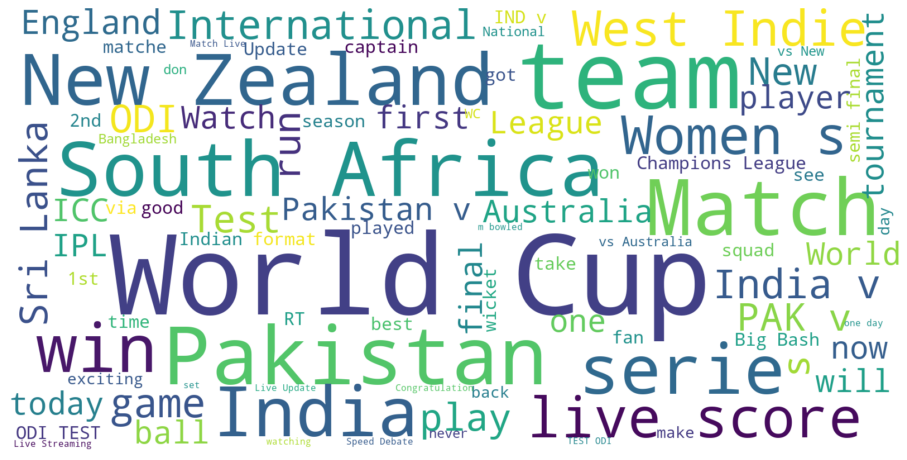

In [109]:
show_wordcloud(tweets['Text'], title = '')

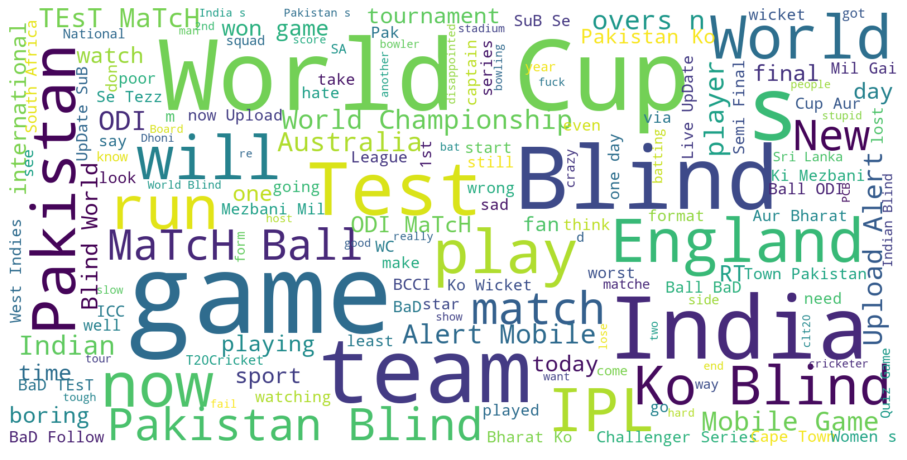

In [110]:
neg_tweets = tweets[tweets["Result"] == "Negative"]
show_wordcloud(neg_tweets['Text'], title = '')

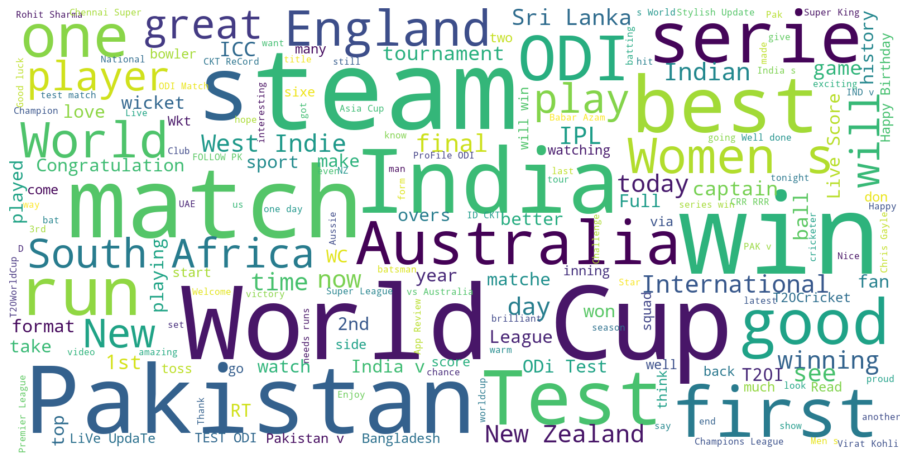

In [111]:
pos_tweets = tweets[tweets["Result"] == "Positive"]
show_wordcloud(pos_tweets['Text'], title = '')

In [112]:
test = tweets.groupby(by = "Year").agg({'Positive':'sum', 'Negative': 'sum', 'Tweet Id': 'count'}).rename(columns = {'Tweet Id': 'Number of Tweets'})

In [113]:
test["Negative Percentage"]  = test["Negative"]/test["Number of Tweets"]
test["Positive Percentage"]  = test["Positive"]/test["Number of Tweets"]
test

,Positive,Negative,Number of Tweets,Negative Percentage,Positive Percentage
Year,,,,,
2007,42,9,157,0.057325,0.267516
2008,361,115,1828,0.062910,0.197484
2009,3407,651,13442,0.048430,0.253459
2010,4329,1064,20000,0.053200,0.216450
2011,4670,1006,20000,0.050300,0.233500
2012,4078,1738,20000,0.086900,0.203900
2013,4484,579,20000,0.028950,0.224200
2014,5397,814,20000,0.040700,0.269850
2015,4717,857,20000,0.042850,0.235850


### LOOKING AT HOW POSITIVE AND NEGATIVE TWEET PERCENTAGES HAVE CHANGED OVER THE YEARS

(0.02, 0.1)

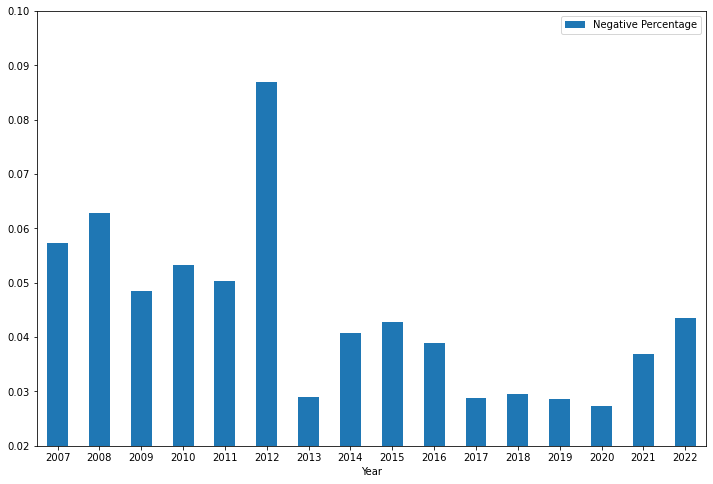

In [122]:
test.plot.bar(y = 'Negative Percentage', rot = 0, figsize =(12,8) ).set_ylim(0.02, 0.10)

(0.1, 0.35)

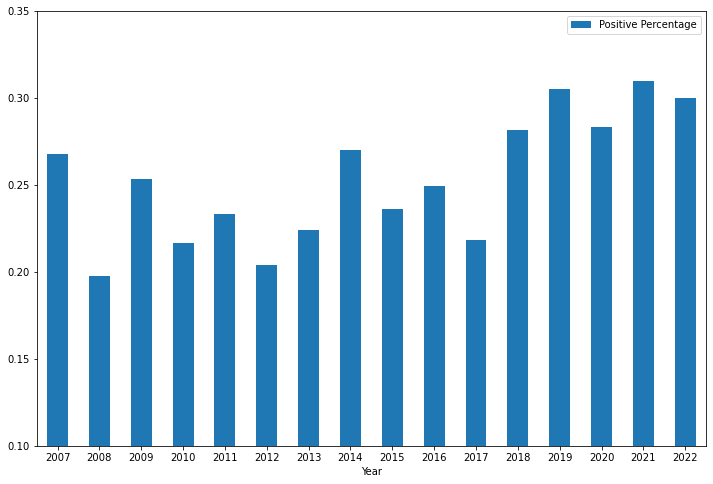

In [123]:
test.plot.bar(y = 'Positive Percentage', rot = 0, figsize =(12,8) ).set_ylim(0.1, 0.35)